In [1]:
import numpy as np
import pandas as pd 
import pymysql
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# Training data
app_train = pd.read_csv('/Users/colinepiera/GitHub/CreditRisk/application_train.csv')

In [2]:
app_train['TARGET'].isnull().values.any()

False

In [3]:
# Encodage des variables catégorielles
le = LabelEncoder()
le_count = 0

# Itération sur chaque colonne
for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
        
            le_count += 1

print('%d colonnes encodées' % le_count)

3 colonnes encodées


In [4]:
app_train = pd.get_dummies(app_train)
print('Description des features: ', app_train.shape)

Description des features:  (307511, 243)


In [5]:
from sklearn.model_selection import train_test_split
features = app_train.loc[:, app_train.columns != 'TARGET']
target = app_train.TARGET
class_names = app_train.TARGET

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.20, random_state = 10)

In [6]:
features_train.shape,features_test.shape, target_train.shape, target_test.shape

((246008, 242), (61503, 242), (246008,), (61503,))

In [7]:
features_train=features_train.fillna(features_train.median())

In [8]:
list_categorical=[]
for col in app_train:
    if app_train[col].dtype == 'object'  and app_train[col].isnull().values.any():
        list_categorical.append(col)

In [9]:
from sklearn.impute import SimpleImputer

# Création d'un imputer
imputer = SimpleImputer(strategy='most_frequent')

for col in list_categorical:
    data = features_train[col].values.reshape(-1, 1) 
    features_train[col] = imputer.fit_transform(data)

In [10]:
app_train.fillna(app_train.median(), inplace=True)
app_train.isnull().values.any()

False

In [11]:
from sklearn.model_selection import train_test_split
features = app_train.loc[:, app_train.columns != 'TARGET']
target = app_train.TARGET
class_names = app_train.TARGET

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

In [12]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)
predicted_probas=clf.predict_proba(features_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_pred)

0.911857958148383

In [14]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, target_pred)
cnf_matrix

array([[56050,   488],
       [ 4933,    32]])

In [15]:
TN, FP, FN, TP = confusion_matrix(target_test, target_pred).ravel() 
TN, FP, FN, TP

(56050, 488, 4933, 32)

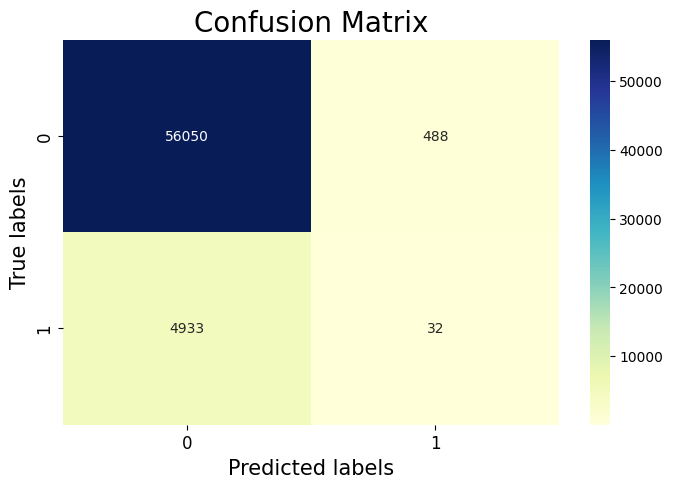

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt     

plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu', ax=ax, fmt='g', cbar=True)

ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('True labels', fontsize=15)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['0', '1'], fontsize=12)
ax.yaxis.set_ticklabels(['0', '1'], fontsize=12)

plt.show()

In [17]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.911857958148383

In [18]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.006445115810674723

In [19]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9913686370228872

In [20]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.06153846153846154

In [21]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9191086040371907

In [22]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.9384615384615385

In [23]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.011668185961713765

In [24]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, target_pred)

0.49890687641678094

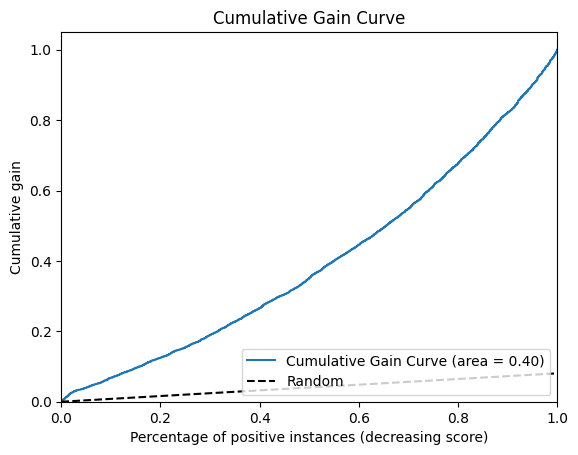

In [25]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np

# Compute Cumulative Gain Curve
pos = np.sum(target_test == 1)
neg = np.sum(target_test == 0)
pos_ratio = pos / (pos + neg)
y_test_sorted = sorted([(proba[1], true) for proba, true in zip(predicted_probas, target_test)], reverse=True)
x_cumulative = np.cumsum([1 if y == 1 else 0 for proba, y in y_test_sorted]) / pos
y_cumulative = np.cumsum([1 if y == 0 else 0 for proba, y in y_test_sorted]) / neg

# Compute AUC for Cumulative Gain Curve
auc_val = auc(x_cumulative, y_cumulative)

# Plot Cumulative Gain Curve
plt.plot(x_cumulative, y_cumulative, label='Cumulative Gain Curve (area = %0.2f)' % auc_val)
plt.plot([0, 1], [0, pos_ratio], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Percentage of positive instances (decreasing score)')
plt.ylabel('Cumulative gain')
plt.title('Cumulative Gain Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 0.0001)
logreg.fit(features_train, target_train)
target_pred = logreg.predict(features_test)
predicted_probas = logreg.predict_proba(features_test)

/Users/colinepiera/GitHub/Credit_Risk/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_pred)

0.9192559712534348

In [28]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, target_pred)
cnf_matrix

array([[56537,     1],
       [ 4965,     0]])

In [29]:
TN, FP, FN, TP = confusion_matrix(target_test, target_pred).ravel() 
TN, FP, FN, TP

(56537, 1, 4965, 0)

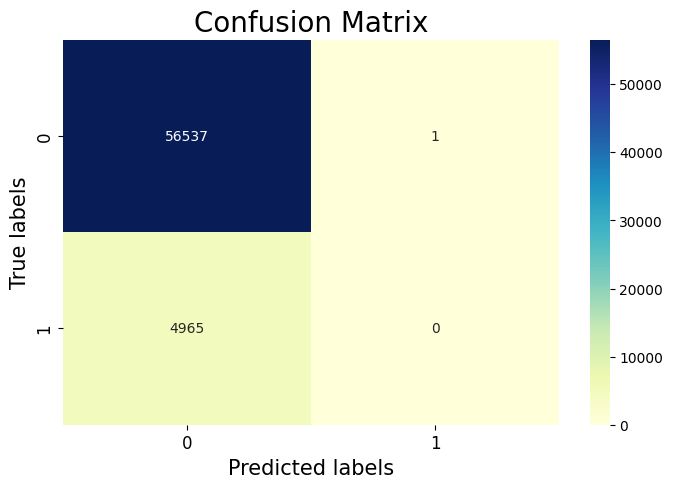

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt     

plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu', ax=ax, fmt='g', cbar=True)

ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('True labels', fontsize=15)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['0', '1'], fontsize=12)
ax.yaxis.set_ticklabels(['0', '1'], fontsize=12)

plt.show()

In [31]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.9192559712534348

In [32]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.0

In [33]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9999823127807846

In [34]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.0

In [35]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9192709180189262

In [36]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

1.0

In [37]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

/var/folders/8f/xmb1yb390vb2jphtrt2qr55h0000gn/T/ipykernel_2306/4115964942.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  F1= 2/ ((1/Precision) + (1/Sensitivity))


0.0

In [38]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, target_pred)

0.4999911563903923

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)
predicted_probas = clf.predict_proba(features_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_pred)

0.850836544558802

In [41]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, target_pred)
cnf_matrix

array([[51548,  4990],
       [ 4184,   781]])

In [42]:
TN, FP, FN, TP = confusion_matrix(target_test, target_pred).ravel() 
TN, FP, FN, TP

(51548, 4990, 4184, 781)

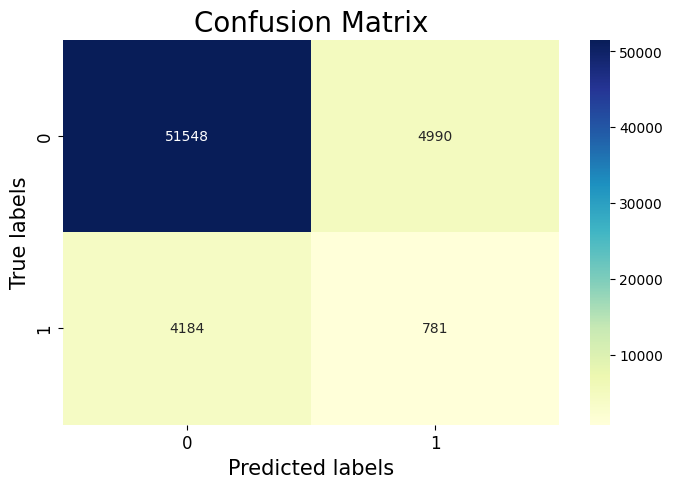

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt     

plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu', ax=ax, fmt='g', cbar=True)
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('True labels', fontsize=15)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['0', '1'], fontsize=12)
ax.yaxis.set_ticklabels(['0', '1'], fontsize=12)
plt.show()

In [44]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.850836544558802

In [45]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.15730110775427997

In [46]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9117407761151791

In [47]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.13533183157165135

In [48]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.924926433646738

In [49]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.8646681684283486

In [50]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.14549180327868852

In [51]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, target_pred)

0.5345209419347297

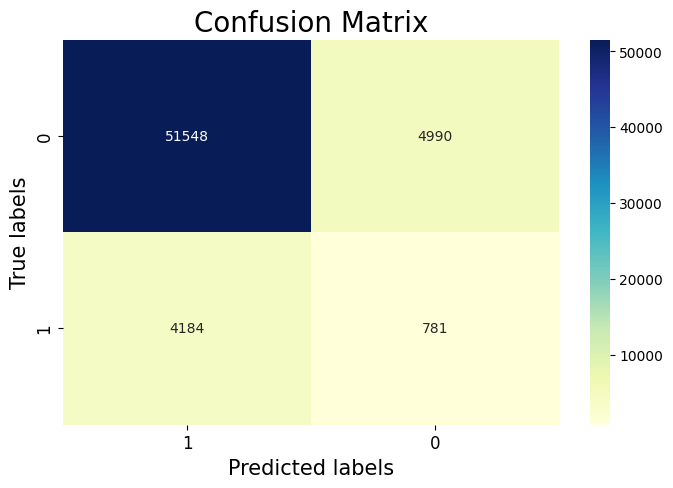

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt     

plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu', ax=ax, fmt='g', cbar=True)
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('True labels', fontsize=15)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['1', '0'], fontsize=12)
ax.yaxis.set_ticklabels(['0', '1'], fontsize=12)
plt.show()

In [53]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.850836544558802

In [54]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.15730110775427997

In [55]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9117407761151791

In [56]:
app_train.fillna(app_train.median(), inplace=True)

In [57]:
from sklearn.model_selection import train_test_split
features = app_train.loc[:, app_train.columns != 'TARGET']
target = app_train.TARGET
class_names = app_train.TARGET

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

In [58]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(features_train, target_train)

y_pred=clf.predict(features_test)
predicted_probas=clf.predict_proba(features_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [59]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Prédire les classes et les probabilités des données de test
y_pred = logreg.predict(features_test)
predicted_probas = logreg.predict_proba(features_test)

# Calculer la précision
accuracy = accuracy_score(target_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculer le rappel
recall = recall_score(target_test, y_pred)
print(f'Recall: {recall}')

# Calculer le score F1
f1 = f1_score(target_test, y_pred)
print(f'F1 Score: {f1}')

# Calculer l'aire sous la courbe ROC
roc_auc = roc_auc_score(target_test, predicted_probas[:, 1])
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.9192559712534348
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.6181902130934085


In [60]:
# Extract feature importances
features = list(app_train.columns)
features.remove('TARGET')
feature_importance_values = clf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, y_pred)

0.9192559712534348

In [62]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, y_pred)
cnf_matrix

array([[56537,     1],
       [ 4965,     0]])

In [63]:
import dill as pickle

In [64]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(features_train, target_train)

y_pred=clf.predict(features_test)
predicted_probas=clf.predict_proba(features_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


In [65]:
# Extract feature importances
features = list(app_train.columns)
features.remove('TARGET')
feature_importance_values = clf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [66]:

from sklearn.metrics import accuracy_score
accuracy_score(target_test, y_pred)

0.919337268100743

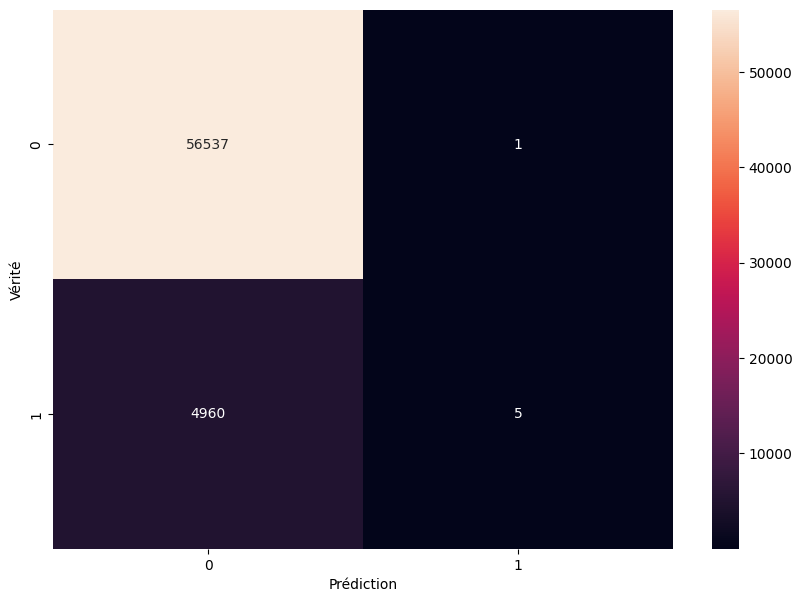

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la matrice de confusion
cnf_matrix = confusion_matrix(target_test, y_pred)

# Création de la heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

In [68]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
print(Sensitivity)

#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
print(Specificity)

#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
print(Precision)

#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
print(NPV)

#False Discovery Rate (FDR)
FDR = 1-Precision
print(FDR)

#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
print(F1)

0.15730110775427997
0.9117407761151791
0.13533183157165135
0.924926433646738
0.8646681684283486
0.14549180327868852


In [69]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, y_pred)

0.5004946810631014

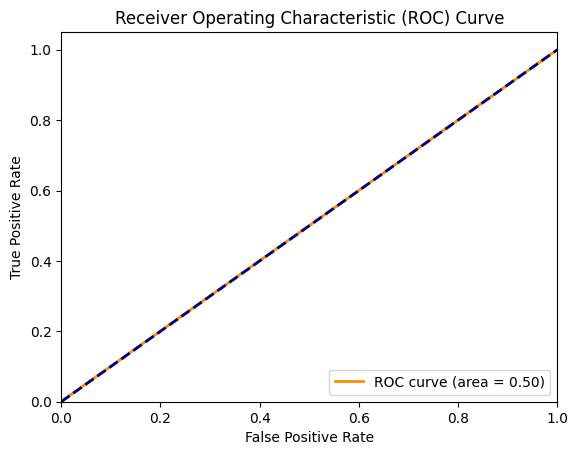

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Suppose y_pred contient les scores prédits pour les classes positives
# target_test contient les vraies étiquettes (0 ou 1) pour les données de test

# Calculer la courbe ROC
fpr, tpr, _ = roc_curve(target_test, y_pred)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [71]:
def plot_feature_importances(df):
    """
    Trace les importances renvoyées par un modèle. Cela peut fonctionner avec n'importe quelle mesure
    de l'importance des caractéristiques à condition que une importance plus élevée soit meilleure.
    
    Args:
        df (dataframe): importances des caractéristiques. Doit avoir les caractéristiques dans une colonne
        appelée `features` et les importances dans une colonne appelée `importance`
        
    Returns:
        affiche un graphique des 15 caractéristiques les plus importantes
        
        df (dataframe): importances des caractéristiques triées par importance (de la plus élevée à la plus faible) 
        avec une colonne pour l'importance normalisée
    """
    
    # Trier les caractéristiques en fonction de l'importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normaliser les importances des caractéristiques pour qu'elles s'additionnent à un
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Créer un graphique à barres horizontales des importances des caractéristiques
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Besoin d'inverser l'index pour tracer le plus important en haut
    ax.barh(df.index[:15][::-1], 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Définir les yticks et les labels
    ax.set_yticks(df.index[:15][::-1])
    ax.set_yticklabels(df['feature'].head(15))
    
    # Étiquetage du graphique
    plt.xlabel('Importance Normalisée', fontsize=15)
    plt.title('Importances des Caractéristiques', fontsize=20)
    plt.show()
    
    return df

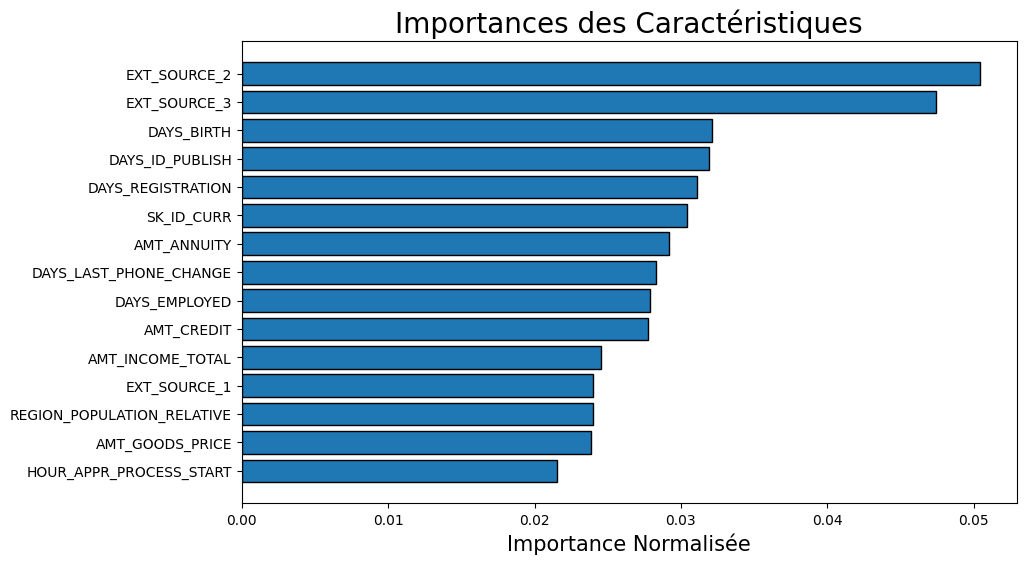

In [72]:
feature_importances_sorted = plot_feature_importances(feature_importances)

In [73]:
app_test = pd.read_csv('/Users/colinepiera/GitHub/CreditRisk/application_test.csv')

In [74]:
app_test.fillna(app_train.median(), inplace=True)

list_categorical=[]
for col in app_test:
    if app_test[col].dtype == 'object'  and app_test[col].isnull().values.any():
        list_categorical.append(col)

In [75]:
from sklearn.impute import SimpleImputer

# Créer un imputer qui remplace les valeurs manquantes par la valeur la plus fréquente dans chaque colonne
imputer = SimpleImputer(strategy='most_frequent')

for col in list_categorical:
    data = app_test[col].values.reshape(-1, 1)  # Reshape les données pour qu'elles aient une seule colonne
    app_test[col] = pd.Series(imputer.fit_transform(data).flatten())

In [76]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_test:
    if app_test[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_test[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_test[col])
            # Transform both training and testing data
            app_test[col] = le.transform(app_test[col])
            

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

5 columns were label encoded.


In [77]:
app_test = pd.get_dummies(app_test)
print('Training Features shape: ', app_test.shape)

Training Features shape:  (48744, 237)


In [78]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 236)
Testing Features shape:  (48744, 235)


In [79]:
app_test.to_csv(r'/Users/colinepiera/GitHub/CreditRisk/Final_test.csv',index=False)

In [97]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,True,False,False,False,False,False,False,False,True,False
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,True,False,False,False,False,False,False,True,False,False
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,True,False,False,False,False,False,False,True,False,False
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,True,False,False,False,False,False,False,True,False,False
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,True,False,False,False,False,False,False,True,False,False


In [80]:
features = app_train.loc[:, app_train.columns != 'TARGET']
target = app_train.TARGET

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 0.0001)
logreg.fit(features, target)

/Users/colinepiera/GitHub/Credit_Risk/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.0001)

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, max_depth = 3, random_state = 0)
gb.fit(features, target)

GradientBoostingClassifier(random_state=0)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Entraîner le modèle sur les données d'entraînement
gb.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = gb.predict(X_test)
predicted_probas = gb.predict_proba(X_test)

# Calculer les métriques de performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, predicted_probas[:,1])

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.9198087898151309
Recall: 0.011921600323297636
F1 Score: 0.023366336633663366
ROC AUC Score: 0.7509056123922796


In [84]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [86]:
# Définir les paramètres du modèle
params = {
    'objective': 'binary:logistic', # fonction d'objectif pour la classification binaire
    'eval_metric': 'logloss', # métrique d'évaluation pour le suivi de la performance
    'eta': 0.1, # taux d'apprentissage
    'max_depth': 3, # profondeur maximale de l'arbre
    'subsample': 0.8, # fraction d'échantillons utilisés pour entraîner chaque arbre
    'colsample_bytree': 0.8, # fraction de caractéristiques utilisées pour entraîner chaque arbre
    'seed': 42 # graine pour la reproductibilité
}

# Convertir les données dans le format DMatrix de XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Entraîner le modèle
num_round = 100 # nombre d'itérations d'entraînement
bst = xgb.train(params, dtrain, num_round)


In [87]:
# Faire des prédictions sur les données de test
y_pred_proba = bst.predict(dtest)
y_pred = [1 if p > 0.5 else 0 for p in y_pred_proba]

# Calculer les métriques de performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.9196949742288995
Recall: 0.006668013740149525
F1 Score: 0.013186813186813187
ROC AUC Score: 0.7512273168780806


In [88]:
import dill as pickle
clf = 'model.pk'

In [89]:
"""Setting the headers to send and accept json responses
"""
header = {'Content-Type': 'application/json', \
                  'Accept': 'application/json'}

"""Reading test batch
"""
df = pd.read_csv('/Users/colinepiera/GitHub/CreditRisk/application_test.csv', encoding="utf-8-sig")
#df = df.head()

"""Converting Pandas Dataframe to json
"""
data = df.to_json(orient='records')

In [90]:
with open('/Users/colinepiera/GitHub/Credit_Risk/myenv/share/jupyter/kernels/python3'+clf,'wb') as f:
     pickle.dump(gb, f)

In [91]:
import json
import requests
import pandas as pd

In [92]:
data = df.to_json(orient='records')

NameError: name 'Final_test' is not defined